In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
plt.style.use('fivethirtyeight')

## Run this at the end for survey data

In [134]:
unique_titles = len(nodups)
total_ratings = len(dfwr['user_rating'])
total_users = df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count()

#users_without_ratings = 
df.head()

NameError: name 'nodups' is not defined

In [32]:
data = np.load('src/data/datacln.npy', allow_pickle = True)

df = pd.DataFrame(data, columns = ['title','author', 'isbn', 'book_type', 'pages', 'userid', 'user_rating', 'num_rate', 'av_rate'])  

#get rid of any users who haven't added any books, and any added books with no user rating
dfwr = df.dropna(axis=0)
actually_rated = dfwr['user_rating'] != 0
dfwr = dfwr[actually_rated]
#dfwr.info()
#dfwr.head()
dfwr.tail()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
82692,Twilight: The Complete Illustrated Movie Compa...,"Vaz, Mark Cotta",9780316043137,format,144,95715431,4,328573,4.24
82693,Sorcery of Thorns,"Rogerson, Margaret",9781481497619,format,456,95715431,2,22646,4.16
82694,The Steward,"Shields, Christopher",,format,336,95715431,1,543,3.93
82717,Ayah Menyayangi Tanpa Akhir,"Kejora, Kirana",9786027735460,format,372,45343307,4,250,3.84
82720,The Lightning Thief,"Riordan, Rick",9780786838653,format,377,68162066,5,1803760,4.25


In [8]:


users = df.drop_duplicates(subset='userid', keep='first', inplace=False)
mask = users['userid'=='None']
users[mask]

KeyError: False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82722 entries, 0 to 82721
Data columns (total 9 columns):
title          78448 non-null object
author         78448 non-null object
isbn           78448 non-null object
book_type      78448 non-null object
pages          75024 non-null object
userid         82722 non-null object
user_rating    78448 non-null object
num_rate       78448 non-null object
av_rate        78448 non-null object
dtypes: object(9)
memory usage: 5.7+ MB


In [145]:
total_users = str(df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count())
total_books = str(dfwr.drop_duplicates(subset='title', keep='first', inplace=False)['title'].count())
total_ratings = str(dfwr['user_rating'].count())

production_statement = 'I scraped {} user bookshelfs from goodreads, gathering {} ratings on {} books'.format(total_users,total_ratings,total_books)

print(production_statement)

I scraped 13878 user bookshelfs from goodreads, gathering 50109 ratings on 21569 books


In [5]:
df.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
0,None,None,None,None,None,7171593,None,None,None
1,None,None,None,None,None,6060131,None,None,None
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77


In [6]:
from sqlalchemy import create_engine
import psycopg2 
import io

In [8]:
ratings = dfwr['user_rating']

av_rate presumably has some duplicates because of books read by more than one user. So lets sort those out. 

In [15]:
dfwr[['title', 'av_rate']].sort_values('title')

,title,av_rate
27312,"""A Problem from Hell"": America and the Age of ...",4.22
15336,"""B"" Is for Betsy",4.03
1370,"""B"" Is for Betsy",4.03
35338,"""C"" Is For Corpse",3.91
18211,"""Multiplication Is for White People"": Raising ...",4.14
...,...,...
768,百千さん家のあやかし王子 12 [Momochi-san Chi no Ayakashi O...,4.18
743,盾の勇者の成り上がり 11,4.11
516,青鸟书店（一部关于记忆与慰藉的书店史诗，触痛每个人内心深处的脆弱与柔软）,5
14224,나의 투쟁 1,4.08


In [19]:
total_users = df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count()


In [41]:
df.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
0,None,None,None,None,None,7171593,None,None,None
1,None,None,None,None,None,6060131,None,None,None
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77


## make a quintile ranking for all books based on their average rating

so, first we have to remove all duplicate rows where more than one person has rated the same book, because that over-weights the ratings of books that multiple users sampled had rated. Then we toss that into this disgusting histogram and complain about it in results

In [82]:
quin[quin['num_rate']> 10]

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77
5,Good Omens: The Nice and Accurate Prophecies o...,"Pratchett, Terry",,format,491,22197300,5,476232,4.25
6,The Host,"Meyer, Stephenie",9780316068048,format,620,22197300,5,848921,3.84
...,...,...,...,...,...,...,...,...,...
82651,Love Anthony,"Genova, Lisa",9781439164686,format,309,51650920,5,31118,3.96
82658,The Sound of Glass,"White, Karen",9780451470898,format,432,51650920,4,16345,4.01
82693,Sorcery of Thorns,"Rogerson, Margaret",9781481497619,format,456,95715431,2,22646,4.16
82694,The Steward,"Shields, Christopher",,format,336,95715431,1,543,3.93


In [99]:
sum(quin['num_rate']< 11)


0

In [83]:
quin = dfwr.drop_duplicates(subset='title', keep='first', inplace=False)
nums = quin['av_rate']
test = nums.quantile([.94])
np.mean(av_rate)
np.mean(av_user_rating)

4.483565826498234

In [84]:
#getting the 20 percent quintiles of book ratings
x = 1
quants = []
while x > 0:
    quants.append(nums.quantile(x))
    x-=.01
quants[0] ,quants[20], quants[40], quants[60], quants[80], quants[99]


(4.91, 4.25, 4.1, 3.96, 3.8, 3.24)

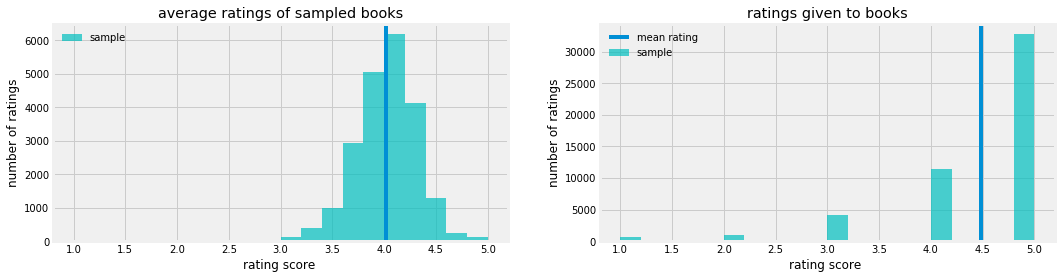

In [39]:
av_rate = quin['av_rate']
av_user_rating = dfwr['user_rating']

# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
#null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample), size=len(sample), random_state=None)
fig, ax = plt.subplots(1, 2, figsize = (16,4))

#ax = plt.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')
ax[0].hist(av_rate, color = 'c', bins = 20, alpha = .7, label ='sample')

ax[0].set_title('average ratings of sampled books')
ax[0].set_ylabel('number of ratings')
ax[0].set_xlabel('rating score ')
ax[0].axvline(np.mean(av_rate))

ax[0].legend(loc='upper left', frameon = False)

ax[1].hist(av_user_rating, color = 'c', bins = 20, alpha = .7, label ='sample')

ax[1].set_title('ratings given to books')
ax[1].set_ylabel('number of ratings')
ax[1].set_xlabel('rating score ')
ax[1].axvline(np.mean(av_user_rating), label = "mean rating")

ax[1].legend(loc='upper left', frameon = False)


#fig.xlabel('number of ratings')
plt.show()
#fig.xlabel('number of ratings')


# fig.savefig('img/simpsons_paradox', bbox_inches = 'tight', transparent = True)

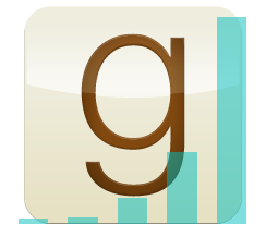

In [132]:
# img = plt.imread("img/bigG.png")
# fig, ax = plt.subplots()

# ax.imshow(img)
# ax.set_title('ratings given to books')
# ax.set_ylabel('number of ratings')
# ax.set_xlabel('rating score ')
# ax.axvline(np.mean(av_user_rating), label = "mean rating")

# ax.legend(loc='upper left', frameon = False)
# #fig.xlabel('number of ratings')
# plt.show()


fig=plt.figure(figsize = (4,4))
ax=fig.add_subplot(111, label="1", frame_on = False)
ax.imshow(img)
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax2.hist(av_user_rating, color = 'c', bins = 5, alpha = .5, rwidth = .6)
ax.set_xticks([])
ax.set_yticks([])
ax2.set_xticks([1,2,3,4,5])
plt.axis('off')
plt.grid(b=None)


plt.show()
# fig.savefig('img/bigG_overlay', bbox_inches = 'tight', transparent = True)

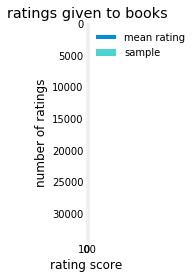

In [100]:
# histogram of user ratings
img = plt.imread("img/bigG.png")
av_user_rating = dfwr['user_rating']
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
#null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample), size=len(sample), random_state=None)
fig, ax = plt.subplots()

ax.imshow(img)
#ax = plt.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')
ax.hist(av_user_rating, color = 'c', bins = 20, alpha = .7, label ='sample')

ax.set_title('ratings given to books')
ax.set_ylabel('number of ratings')
ax.set_xlabel('rating score ')
ax.axvline(np.mean(av_user_rating), label = "mean rating")

ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

#fig.savefig('img/results_of_individual_ratings', dpi = 300, bbox_inches = 'tight', transparent = True)

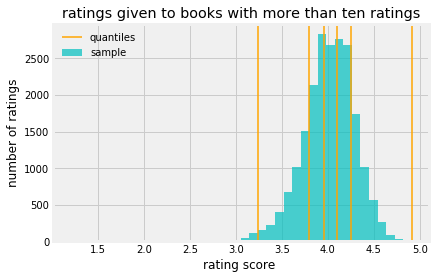

In [86]:
# histogram of average ratings with quintiles

av_book_rate = quin['av_rate']
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
#null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample), size=len(sample), random_state=None)
fig, ax = plt.subplots()

#ax = plt.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')
ax.hist(av_book_rate, color = 'c', bins = 40, alpha = .7, label ='sample')

ax.set_title('ratings given to books with more than ten ratings')
ax.set_ylabel('number of ratings')
ax.set_xlabel('rating score ')
ax.axvline(quants[0], linewidth = 1.5, c = 'orange', label = 'quantiles')

ax.axvline(quants[20], linewidth = 1.5, c = 'orange')
ax.axvline(quants[40], linewidth = 1.5, c = 'orange')
ax.axvline(quants[60], linewidth = 1.5, c = 'orange')
ax.axvline(quants[80], linewidth = 1.5, c = 'orange')
ax.axvline(quants[99], linewidth = 1.5, c = 'orange')

# ax.axvline(quants[40])
# ax.axvline(quants[60])
# ax.axvline(quants[80])
# ax.axvline(quants[99])




ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

#fig.savefig('img/quantiles', dpi = 300, bbox_inches = 'tight', transparent = True)

Simpson's paradox



In [18]:
quin.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77
5,Good Omens: The Nice and Accurate Prophecies o...,"Pratchett, Terry",,format,491,22197300,5,476232,4.25
6,The Host,"Meyer, Stephenie",9780316068048,format,620,22197300,5,848921,3.84


In [13]:
#dir(test)

In [6]:
x = 2
x - 1

x

2

In [48]:
low = 1.96*(np.std(quin['av_rate'])/np.sqrt(len(quin['av_rate'])-1))
low

0.0040090639394472

In [16]:
quin[(quin['av_rate'] < 3.1) & (dfwr['num_rate'] > 1) ]


/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
186,"Revolution 2020: Love, Corruption, Ambition","Bhagat, Chetan",9788129118806,format,296,50941109,4,52277,3.09
188,One Night at the Call Center,"Bhagat, Chetan",9780345498328,format,320,50941109,4,51389,2.5
604,Four Blondes,"Bushnell, Candace",9780802138255,format,256,9968410,5,24443,2.82
1793,The Rose Labyrinth,"Hardie, Titania",9780755344567,format,400,8991146,5,3002,2.92
2564,Welcome to Scranton,"Halpin, Greg",,format,152,41384409,3,148,2.88
...,...,...,...,...,...,...,...,...,...
76575,Mörkrädd,"Roman, Andreas",,format,256,24706560,3,189,2.96
77991,Irresistible: Libro 1,"Hill, Robyn",,format,294,50397312,3,212,3.08
79013,Mara,"Slavici, Ioan",9789735570897,format,242,84155016,2,4459,3.06
79181,خمسة خصوصي,"حسن, علي",9789776471214,format,160,64474380,1,108,2.22


AttributeError: 'Series' object has no attribute 'info'

In [55]:
quants[0] ,quants[20], quants[40], quants[60], quants[80], quants[99]

(5.0, 4.25, 4.1, 3.96, 3.79, 3.1900000000000004)

In [133]:
for names in bad_books:
    print(names)

NameError: name 'bad_books' is not defined